# Challenge: Backtest on Other Datasets

## Download data from `yfinance`

In [5]:
import yfinance as yf

ticker = 'NFLX'
df = yf.download(ticker, multi_level_index=False, auto_adjust=False, start='2000-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2002-05-23,1.196429,1.196429,1.242857,1.145714,1.156429,104790000
2002-05-24,1.210000,1.210000,1.225000,1.197143,1.214286,11104800
2002-05-28,1.157143,1.157143,1.232143,1.157143,1.213571,6609400
2002-05-29,1.103571,1.103571,1.164286,1.085714,1.164286,6757800
2002-05-30,1.071429,1.071429,1.107857,1.071429,1.107857,10154200
...,...,...,...,...,...,...
2025-10-14,1215.349976,1215.349976,1224.290039,1203.099976,1214.750000,2362400
2025-10-15,1203.290039,1203.290039,1219.619995,1201.609985,1213.010010,2025200
2025-10-16,1183.589966,1183.589966,1216.709961,1176.000000,1212.150024,2832600


## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [6]:
assert df is not None
df = df.loc['2020-01-01':].copy()
df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,329.809998,329.809998,329.980011,324.779999,326.100006,4485800
2020-01-03,325.899994,325.899994,329.859985,325.529999,326.779999,3806900
2020-01-06,335.829987,335.829987,336.359985,321.200012,323.119995,5663100
2020-01-07,330.750000,330.750000,336.700012,330.299988,336.470001,4703200
2020-01-08,339.260010,339.260010,342.700012,331.049988,331.489990,7104500
...,...,...,...,...,...,...
2025-10-14,1215.349976,1215.349976,1224.290039,1203.099976,1214.750000,2362400
2025-10-15,1203.290039,1203.290039,1219.619995,1201.609985,1213.010010,2025200
2025-10-16,1183.589966,1183.589966,1216.709961,1176.000000,1212.150024,2832600


### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [8]:
df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df.change_tomorrow

Date
2020-01-02    0.011998
2020-01-03   -0.029569
2020-01-06    0.015359
2020-01-07   -0.025084
2020-01-08    0.010725
                ...   
2025-10-14    0.010022
2025-10-15    0.016644
2025-10-16   -0.013149
2025-10-17   -0.031650
2025-10-20         NaN
Name: change_tomorrow, Length: 1458, dtype: float64

If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [9]:
df['Adj Close']

Date
2020-01-02     329.809998
2020-01-03     325.899994
2020-01-06     335.829987
2020-01-07     330.750000
2020-01-08     339.260010
                 ...     
2025-10-14    1215.349976
2025-10-15    1203.290039
2025-10-16    1183.589966
2025-10-17    1199.359985
2025-10-20    1238.560059
Name: Adj Close, Length: 1458, dtype: float64

We shall multiply by -1:

In [10]:
df.change_tomorrow = df.change_tomorrow * -1
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,329.809998,329.809998,329.980011,324.779999,326.100006,4485800,-0.011998
2020-01-03,325.899994,325.899994,329.859985,325.529999,326.779999,3806900,0.029569
2020-01-06,335.829987,335.829987,336.359985,321.200012,323.119995,5663100,-0.015359
2020-01-07,330.750000,330.750000,336.700012,330.299988,336.470001,4703200,0.025084
2020-01-08,339.260010,339.260010,342.700012,331.049988,331.489990,7104500,-0.010725
...,...,...,...,...,...,...,...
2025-10-14,1215.349976,1215.349976,1224.290039,1203.099976,1214.750000,2362400,-0.010022
2025-10-15,1203.290039,1203.290039,1219.619995,1201.609985,1213.010010,2025200,-0.016644
2025-10-16,1183.589966,1183.589966,1216.709961,1176.000000,1212.150024,2832600,0.013149


To better read the data, we shall multiply by 100 to have percentage values:

In [11]:
df.change_tomorrow = df.change_tomorrow * 100
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,329.809998,329.809998,329.980011,324.779999,326.100006,4485800,-1.199756
2020-01-03,325.899994,325.899994,329.859985,325.529999,326.779999,3806900,2.956851
2020-01-06,335.829987,335.829987,336.359985,321.200012,323.119995,5663100,-1.535899
2020-01-07,330.750000,330.750000,336.700012,330.299988,336.470001,4703200,2.508403
2020-01-08,339.260010,339.260010,342.700012,331.049988,331.489990,7104500,-1.072516
...,...,...,...,...,...,...,...
2025-10-14,1215.349976,1215.349976,1224.290039,1203.099976,1214.750000,2362400,-1.002247
2025-10-15,1203.290039,1203.290039,1219.619995,1201.609985,1213.010010,2025200,-1.664434
2025-10-16,1183.589966,1183.589966,1216.709961,1176.000000,1212.150024,2832600,1.314870


#### Drop rows with any missing data

In [12]:
df = df.dropna().copy()
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,329.809998,329.809998,329.980011,324.779999,326.100006,4485800,-1.199756
2020-01-03,325.899994,325.899994,329.859985,325.529999,326.779999,3806900,2.956851
2020-01-06,335.829987,335.829987,336.359985,321.200012,323.119995,5663100,-1.535899
2020-01-07,330.750000,330.750000,336.700012,330.299988,336.470001,4703200,2.508403
2020-01-08,339.260010,339.260010,342.700012,331.049988,331.489990,7104500,-1.072516
...,...,...,...,...,...,...,...
2025-10-13,1219.030029,1219.030029,1231.119995,1206.810059,1221.349976,2460800,-0.302798
2025-10-14,1215.349976,1215.349976,1224.290039,1203.099976,1214.750000,2362400,-1.002247
2025-10-15,1203.290039,1203.290039,1219.619995,1201.609985,1213.010010,2025200,-1.664434


#### BONUS: how to interpret the distribution of a continuous variable

Based on the following normal distribution:

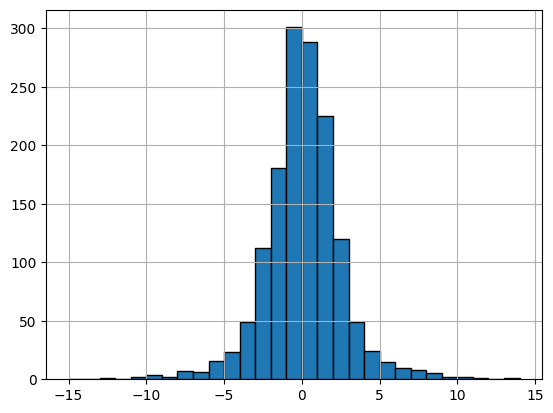

In [13]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

And the standard deviation:

In [14]:
df.change_tomorrow.std()

np.float64(2.9803542711811994)

We can say that 68% of the changes are between -3.5 and 3.5, approximately.

#### Change sign

Did the stock go up or down?

In [15]:
import numpy as np

In [16]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,329.809998,329.809998,329.980011,324.779999,326.100006,4485800,-1
2020-01-03,325.899994,325.899994,329.859985,325.529999,326.779999,3806900,1
2020-01-06,335.829987,335.829987,336.359985,321.200012,323.119995,5663100,-1
2020-01-07,330.750000,330.750000,336.700012,330.299988,336.470001,4703200,1
2020-01-08,339.260010,339.260010,342.700012,331.049988,331.489990,7104500,-1
...,...,...,...,...,...,...,...
2025-10-13,1219.030029,1219.030029,1231.119995,1206.810059,1221.349976,2460800,-1
2025-10-14,1215.349976,1215.349976,1224.290039,1203.099976,1214.750000,2362400,-1
2025-10-15,1203.290039,1203.290039,1219.619995,1201.609985,1213.010010,2025200,-1


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier(max_depth=7, random_state=42)

In [19]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [22]:
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
model.score(X, y)

0.7920384351407

## Backtesting

### Create the strategy

In [24]:
from backtesting import Strategy

/home/mlovera/dev/algorithmic-trading/.venv/lib/python3.12/site-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [25]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Run the Backtest

In [26]:
from backtesting import Backtest

In [27]:
bt = Backtest(
    X, SimpleClassificationUD, cash=10000,
    commission=.002, exclusive_orders=True
)

In [28]:
results = bt.run()

/tmp/ipykernel_126709/695169841.py:1: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  results = bt.run()


### Show the report in a DataFrame

In [29]:
results.to_frame('Value').loc[:'Return [%]']

,Value
Start,2020-01-02 00:00:00
End,2025-10-17 00:00:00
Duration,2115 days 00:00:00
Exposure Time [%],99.862732
Equity Final [$],157059188.872359
Equity Peak [$],157059188.872359
Commissions [$],38169433.03989
Return [%],1570491.888724


## Plot the backtest report

> Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [30]:
bt.plot(filename='backtest_report.html', open_browser=False)

GridPlot(id='p1336', ...)

## How to invest based on the numerical increase?

> Instead of the direction (UP or DOWN)

Next chapter → [Backtesting with Regression Models]()

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

Classification Strategy | Regression Strategy
-|-
![](src/res_classification.png) | ![](src/res_regression.png)